In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import sys
import math
import tensorflow as tf

Using TensorFlow backend.


In [4]:
from keras.datasets import fashion_mnist

In [5]:
((Xtrain_o, Ytrain_o), (Xtest_o, Ytest_o)) = fashion_mnist.load_data()

In [6]:
print(Xtrain_o.shape)
print(Xtest_o.shape)
print(Ytrain_o.shape)
print(Ytest_o.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
X_train=Xtrain_o.reshape(Xtrain_o.shape[0],28*28)
X_test=Xtest_o.reshape(Xtest_o.shape[0],28*28)
Y_train=Ytrain_o
Y_test=Ytest_o

In [8]:
labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
X_train=(X_train-X_train.mean())/255
X_test= (X_test-X_test.mean())/255
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

In [10]:
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.T
Y_test=Y_test.T

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(784, 60000)
(784, 10000)
(10, 60000)
(10, 10000)


It's a picture of a(n) Pullover


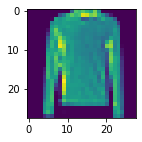

In [12]:
s=np.random.randint(60000, size=1)
Y=X_train.T[s]
Y_img=np.array(Y)
plt.figure(figsize = (10,2))
Y_img=Y_img.reshape(28,28)
plt.imshow(Y_img)
print("It's a picture of a(n)",labels[int(Ytrain_o[s])])

# I-Simple Neural network:#

![title](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

**Useful functions(Sigmoid,ReLU,sigmoid_backward,ReLU_backward):**

In [13]:
def relu(Z):
    

    A = np.maximum(0, Z)

    assert (A.shape == Z.shape)

    cache = Z
    return A, cache


def sigmoid(Z):
  
    # A = 1 / (1 + np.exp(-Z))
    Z = np.clip(Z, -709, 36)
    A = expit(Z)
    if np.max(A) == 1:
        print('whats the fuck')
    cache = Z

    return A, cache


def softmax(Z):
    # e_x = np.exp(Z - np.max(Z))
    # A = e_x / e_x.sum()
    Z = np.clip(Z, -709, 709)
    T = np.exp(Z)
    A = T / np.sum(T, axis=0)
    cache = Z
    return A, cache


def softmax_backward(dA, cache):
    dZ = dA
    return dZ


def relu_backward(dA, cache):
   

    Z = cache[0]
    dZ = np.array(dA, copy=True)  # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)
    return dZ


def sigmoid_backward(dA, cache):


    Z = cache

    # s = 1 / (1 + np.exp(-Z))
    s = expit(Z)
    dZ = dA * s * (1 - s)

    assert (dZ.shape == Z.shape)

    return dZ


**Initializing Parameters:**

In [14]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)  # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert (parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert (parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters


def initialize_parameters_he(layers_dims):

    parameters = {}
    L = len(layers_dims) - 1  # integer representing the number of layers

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(
            2.0 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters


# Forward and Backward Propagation:#

![title](https://qph.fs.quoracdn.net/main-qimg-e599270915026aeb9b5e47cb95e8097c)

**Forward Propagation:**

In [15]:
def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b
    assert (Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache


In [16]:
def linear_activation_forward(A_prev, W, b, activation, keep_prob=1.0):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        D = np.random.rand(A.shape[0], A.shape[1])
        D = D <= keep_prob
        A = A * D
        A = A / keep_prob
        activation_cache = [activation_cache, D]

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

In [17]:
def L_model_forward(X, parameters, keep_prob=1.0):
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)],
                                             activation="relu", keep_prob=keep_prob)
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="softmax")
    caches.append(cache)
    ### END CODE HERE ###

    assert (AL.shape[1] == X.shape[1])

    return AL, caches

**Cost Function:**

In [18]:
def compute_cost_softmax_with_reg(AL, parameters, lambd, Y):
    m = Y.shape[1]
    # Compute the L2 regularization.
    L = len(parameters) // 2  # number of layers in the neural network
    L2_regularization_cost = 0
    for l in range(1, L):
        Wl = parameters['W' + str(l)]
        L2_regularization_cost = L2_regularization_cost + np.sum(np.square(Wl))
    L2_regularization_cost = (lambd / (2 * m)) * L2_regularization_cost
    # Compute loss from aL and y.
    cc1 = np.log(AL)
    logprobs = np.multiply(cc1, Y)
    cost = (-1 / m) * np.nansum(logprobs)
    cost = cost + L2_regularization_cost
    cost = np.squeeze(cost)  # To make sure the shape is what we expect
    assert (cost.shape == ())
    return cost

**Backward Propagation:**

In [19]:
def linear_backward(dZ, cache, lambd):
    # here the cache is not the caches from forward, but caches[l][0], which is a tuple of (A_prev, W, b). where caches[l][1] is cached Z.
    A_prev, W, b = cache

    m = A_prev.shape[1]

    dW = (1.0 / m) * np.dot(dZ, A_prev.T) + (lambd / m) * W
    db = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [20]:
def linear_activation_backward(dA, cache, activation, lambd, keep_prob=1.0):
    linear_cache, activation_cache = cache

    if activation == "relu":
        D = activation_cache[1]
        dA = dA * D
        dA = dA / keep_prob
        dZ = relu_backward(dA=dA, cache=activation_cache)
        dA_prev, dW, db = linear_backward(cache=linear_cache, dZ=dZ, lambd=lambd)

    elif activation == "softmax":
        dZ = softmax_backward(cache=activation_cache, dA=dA)
        dA_prev, dW, db = linear_backward(cache=linear_cache, dZ=dZ, lambd=lambd)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(cache=activation_cache, dA=dA)
        dA_prev, dW, db = linear_backward(cache=linear_cache, dZ=dZ, lambd=lambd)

    return dA_prev, dW, db

In [21]:
def L_model_backward_softmax(AL, Y, caches, lambd, keep_prob=1.0):
    grads = {}
    L = len(caches)  # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)  # after this line, Y is the same shape as AL

    # Initializing the backpropagation with softmax
    dAL = AL - Y 

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L - 1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,
                                                                                                      current_cache,
                                                                                                      "softmax", lambd=lambd)

    # Loop from l=L-2 to l=0
    for l in reversed(range(L - 1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu",
                                                                    lambd=lambd, keep_prob=keep_prob)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

**Update Parameters:**

In [22]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

#### Adam

In [23]:
def initialize_adam(parameters) :
    
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
    ### END CODE HERE ###
    
    return v, s

In [24]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
                ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dW' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dW' + str(l+1)] / np.sqrt(s_corrected['dW' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
        ### END CODE HERE ###

    return parameters, v, s


**Prediction and accuracy:**

In [25]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((m,10))
    
    probas, caches = L_model_forward(X, parameters) 
    probas=probas.T
    for i in range(m):
        for s in range(10):
            if(probas[i][s]>=0.5):
                p[i][s]=1
            else:
                p[i][s]=0
    return p

In [26]:
def accuracy(X,Y):
    predictions = predict(X,Y, parameters)
    prec=0
    succ=[]
    for i in range(X.shape[1]):
        if(np.allclose(predictions[i],Y.T[i])):    
            succ.append(i)
        prec+=np.product(predictions[i]==Y.T[i])
    return(succ,prec*100/X.shape[1])

**Our Model:**

In [27]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, keep_prob=1, num_iterations=1000, print_cost = True):


    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters_he(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_iterations):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            AL, caches = L_model_forward(minibatch_X, parameters, keep_prob)
            
            # Compute cost and add to the cost total
            lambd = 0.01
            cost_total += compute_cost_softmax_with_reg(AL, parameters, lambd, minibatch_Y)
            # Backward propagation
            grads = L_model_backward_softmax(AL, minibatch_Y, caches, lambd, keep_prob=1.0)
            
            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost = cost_total / m
        
       
        # Print the cost every 100 training example
        if print_cost and (i % 100 == 0 or i == num_iterations-1):
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i > 100 and (i % 1 == 0 or i == num_iterations-1):
            costs.append(cost)
                
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show(block=True)
    return parameters

Let's define the number of layers and units of our network

In [29]:
layers_dims = [X_train.shape[0], 50, 10] 

Let's test our model now.

Cost after iteration 0: 0.008724639798891213
Cost after iteration 100: 0.0031190175571651903
Cost after iteration 200: 0.0028495613633332494
Cost after iteration 300: 0.0027542887108797653
Cost after iteration 400: 0.0026684477424739287
Cost after iteration 500: 0.0026342043779069057
Cost after iteration 600: 0.002601482623982391
Cost after iteration 700: 0.002567382703700109
Cost after iteration 800: 0.0025691754956082094
Cost after iteration 900: 0.002578136825794432
Cost after iteration 999: 0.0025634475662920575


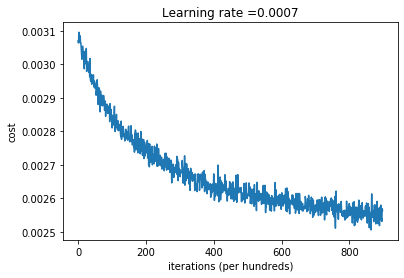

1:24:10.512153
Training accuracy: 96.75166666666667 %
Test accuracy: 87.39 %


In [30]:
import datetime
begin_time = datetime.datetime.now()
#parameters = L_layer_model(X_train, Y_train, layers_dims,print_cost = True)
parameters = model(X_train,Y_train, layers_dims, beta = 0.9, optimizer = "adam")
print(datetime.datetime.now() - begin_time)
print("Training accuracy:",accuracy(X_train,Y_train)[1],"%")
print("Test accuracy:",accuracy(X_test,Y_test)[1],"%")

In [31]:
def plt_label(X,Y,index):
    try:
        Z=X.T[s]
        img=np.array(Z)
        plt.figure(figsize = (10,2))
        img=img.reshape(28,28)
        plt.imshow(img)
        P=predict(X,Y, parameters)
        lbl=labels[int(np.where(P[index]==1)[1])] 
        true_lbl=labels[int(Ytest_o[index])]
        S=lbl,true_lbl
    except:
        S=("I didn't recognize the image")
    if(len(S)==2):
        print("Prediction:",lbl,"\nTrue label:",true_lbl)
    else:
        print(S)

Prediction: Bag 
True label: Bag


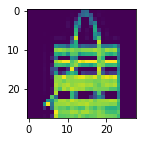

In [32]:
s=np.random.randint(10000, size=1)
S=plt_label(X_test,Y_test,s)